In [32]:
pip install --user seaborn

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install --user scipy

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --user scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression

In [36]:
df=pd.read_csv('dataset/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [37]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [39]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Data Prep

In [40]:
# dropping unuseful column

df.drop('Person ID',axis=1,inplace=True)

In [41]:
# rename them for easier to use

df.columns = ['gender', 'age', 'occupation', 'sleep_dur', 'sleep_q', 'phys_act','stress', 'bmi', 'bld_pressure', 'hr', 'steps', 'sleep_dis']

In [42]:
# spleeting by pressure

df = pd.concat([df, df['bld_pressure'].str.split('/', expand=True)], axis=1).drop('bld_pressure', axis=1)

In [43]:
df=df.rename(columns={0: 'pressure_h', 1: 'pressure_l'})


In [44]:
df['pressure_h'] = df['pressure_h'].astype(float)
df['pressure_l'] = df['pressure_l'].astype(float)

Data Analysis

In [46]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      374 non-null    object 
 1   age         374 non-null    int64  
 2   occupation  374 non-null    object 
 3   sleep_dur   374 non-null    float64
 4   sleep_q     374 non-null    int64  
 5   phys_act    374 non-null    int64  
 6   stress      374 non-null    int64  
 7   bmi         374 non-null    object 
 8   hr          374 non-null    int64  
 9   steps       374 non-null    int64  
 10  sleep_dis   155 non-null    object 
 11  pressure_h  374 non-null    float64
 12  pressure_l  374 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 38.1+ KB


,gender,age,occupation,sleep_dur,sleep_q,phys_act,stress,bmi,hr,steps,sleep_dis,pressure_h,pressure_l
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [48]:
# One-hot encode categorical variables
encoded_df = pd.get_dummies(df)

# Compute correlation matrix
correlation_matrix = encoded_df.corr()


In [49]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      374 non-null    object 
 1   age         374 non-null    int64  
 2   occupation  374 non-null    object 
 3   sleep_dur   374 non-null    float64
 4   sleep_q     374 non-null    int64  
 5   phys_act    374 non-null    int64  
 6   stress      374 non-null    int64  
 7   bmi         374 non-null    object 
 8   hr          374 non-null    int64  
 9   steps       374 non-null    int64  
 10  sleep_dis   155 non-null    object 
 11  pressure_h  374 non-null    float64
 12  pressure_l  374 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 38.1+ KB


,gender,age,occupation,sleep_dur,sleep_q,phys_act,stress,bmi,hr,steps,sleep_dis,pressure_h,pressure_l
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [50]:
# cheking correlation matrix

print(correlation_matrix)

                                      age  sleep_dur   sleep_q  phys_act  \
age                              1.000000   0.344709  0.473734  0.178993   
sleep_dur                        0.344709   1.000000  0.883213  0.212360   
sleep_q                          0.473734   0.883213  1.000000  0.192896   
phys_act                         0.178993   0.212360  0.192896  1.000000   
stress                          -0.422344  -0.811023 -0.898752 -0.034134   
hr                              -0.225606  -0.516455 -0.659865  0.136971   
steps                            0.057973  -0.039533  0.016791  0.772723   
pressure_h                       0.605878  -0.180406 -0.121632  0.265416   
pressure_l                       0.593839  -0.166570 -0.110151  0.382651   
gender_Female                    0.596358   0.121579  0.291366 -0.001454   
gender_Male                     -0.596358  -0.121579 -0.291366  0.001454   
occupation_Accountant           -0.098043  -0.007745  0.160513 -0.016932   
occupation_D

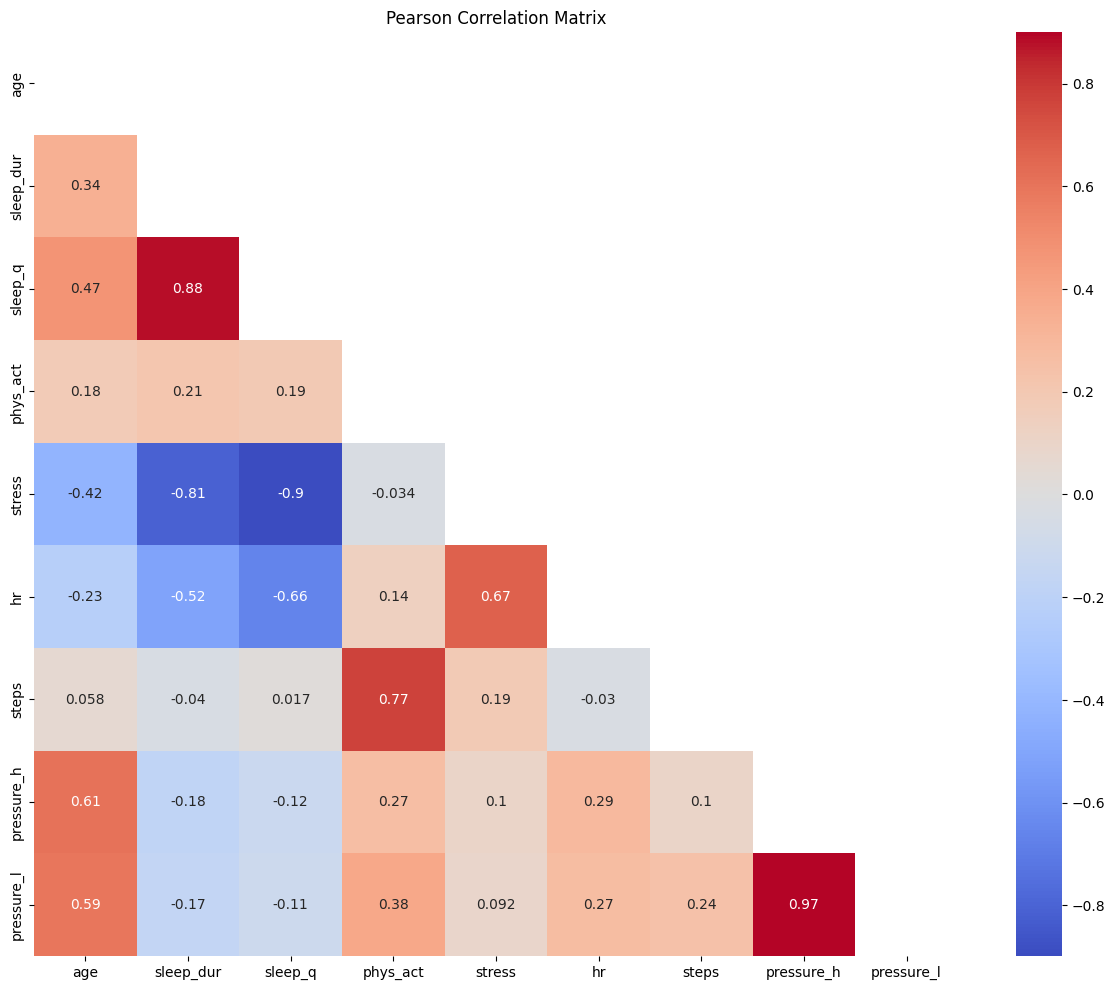

In [53]:
# Pearson correlation matrix
corr = df.select_dtypes(include=['number']).corr(method='pearson')  # Select only numeric columns for correlation
mask = np.triu(np.ones_like(corr, dtype=bool))  # Create a mask to hide the lower triangle

fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='coolwarm', ax=ax)  # Plot the heatmap
plt.title('Pearson Correlation Matrix')
plt.show()

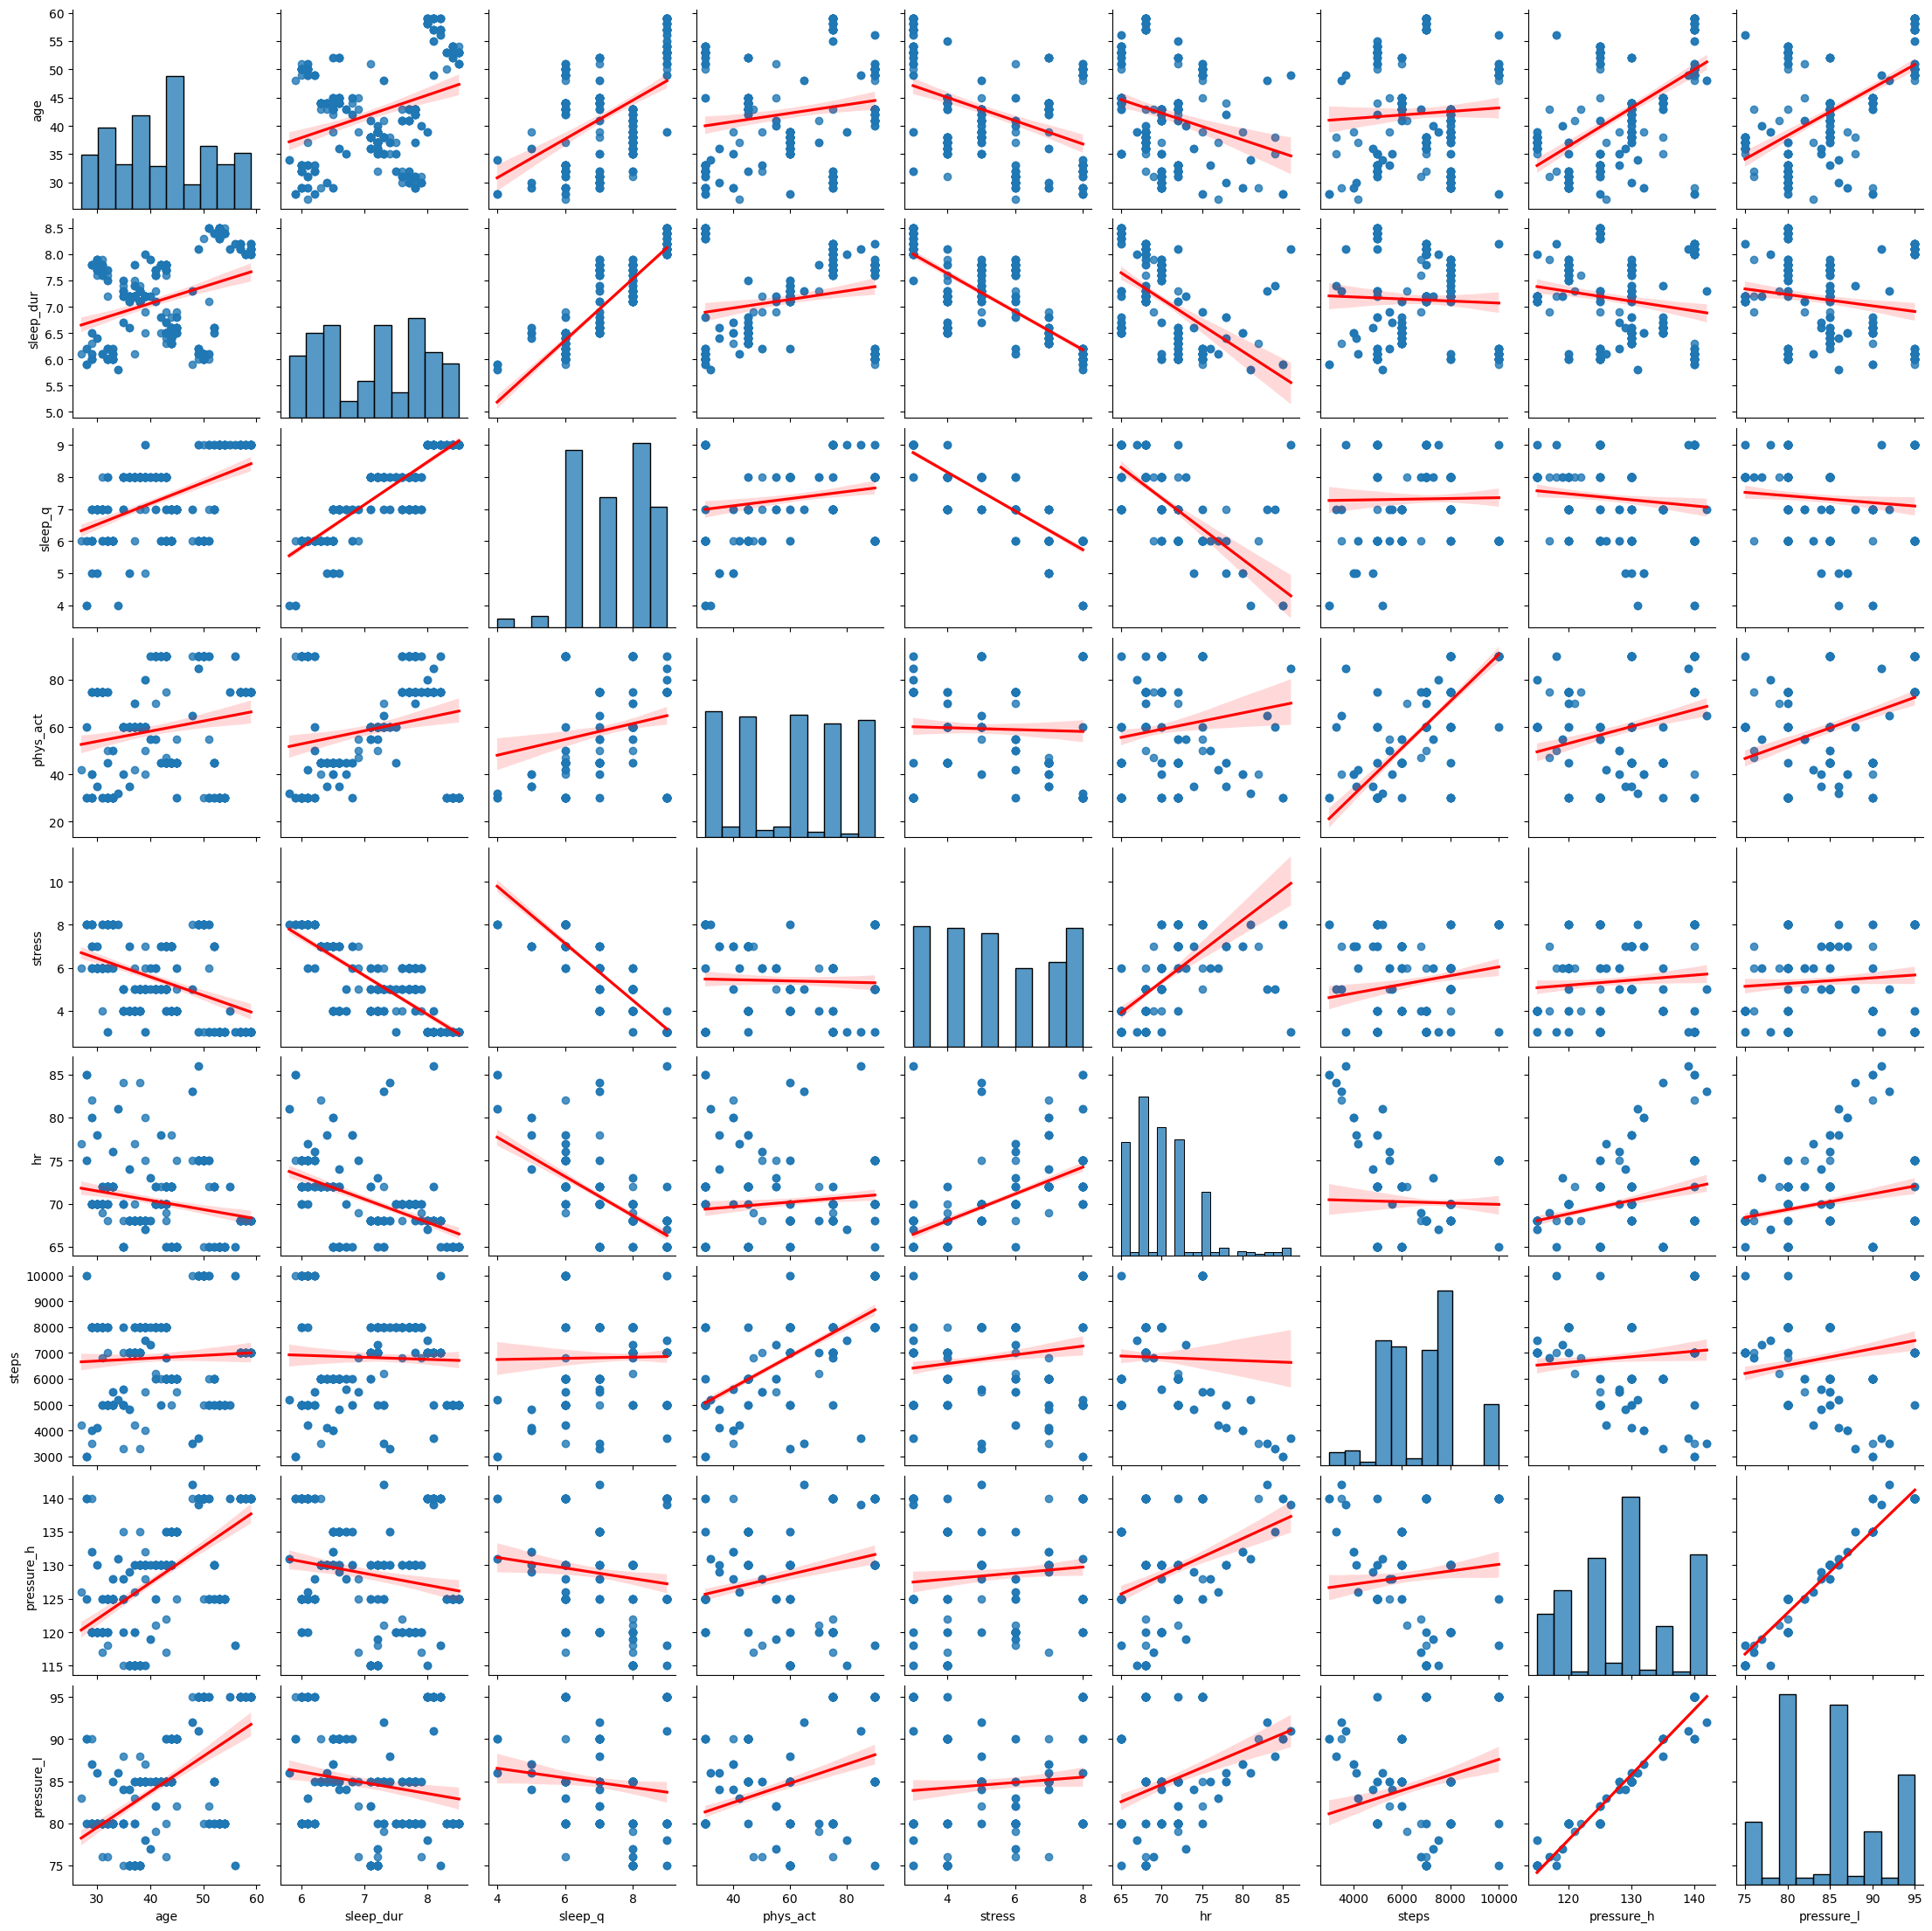

In [54]:
# let's take closer look making linear regression matrix for each value

sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

C:\Users\Zawad\AppData\Local\Temp\ipykernel_12448\4018139392.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Zawad\AppData\Local\Temp\ipykernel_12448\4018139392.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Zawad\AppData\Local\Temp\ipykernel_12448\4018139392.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Zawad\AppData\Local\Temp\ipykernel_12448\4018139392.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


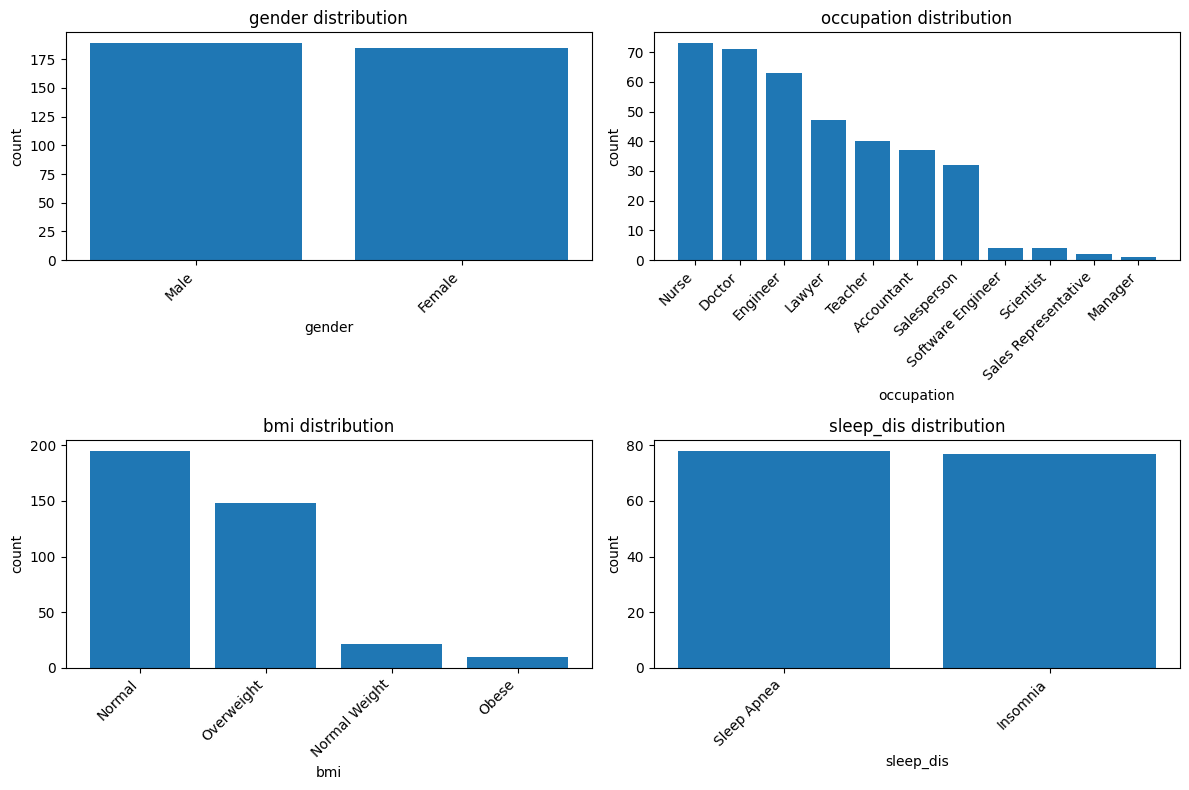

In [55]:
# Cathegories of interviewed

categories = ['gender', 'occupation', 'bmi', 'sleep_dis']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2

    counts = df[category].value_counts()
    
    axes[row, col].bar(counts.index, counts)
    axes[row, col].set_title(f'{category} distribution')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('count')
    
    axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

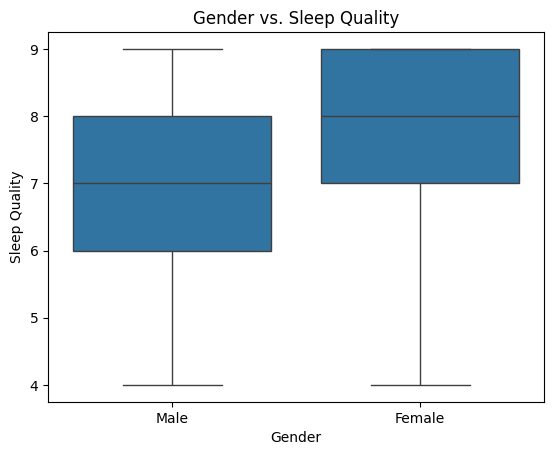

In [56]:
# Let's find the reason, why Male have more stress
# Starting with quality of sleep

sns.boxplot(data=df, x='gender', y='sleep_q')

plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.title('Gender vs. Sleep Quality')

plt.show()

Research in stress level

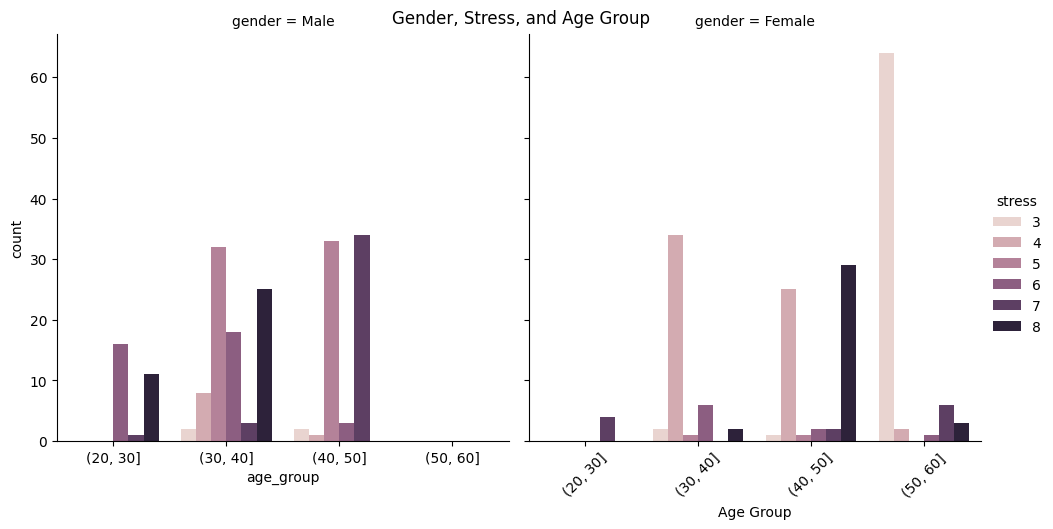

In [57]:
# Lets look at stress level by age and gender

age_groups = [20, 30, 40, 50, 60]
df['age_group'] = pd.cut(df['age'], bins=age_groups)

sns.catplot(data=df, x='age_group', hue='stress', col='gender', kind='count')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.suptitle('Gender, Stress, and Age Group')
plt.xticks(rotation=45)
plt.show()

Key:

Males

Men en their 20s feel under a lot of stress
In their 30s dispersion of stress level is wider
In their 40s they are pretty equal between normal and high level of stress
Females

young women also feel under stress
Much easier at their 30s
Strong dividness between easiness and very high stress in their 40s
Significally less stressed in their 50s

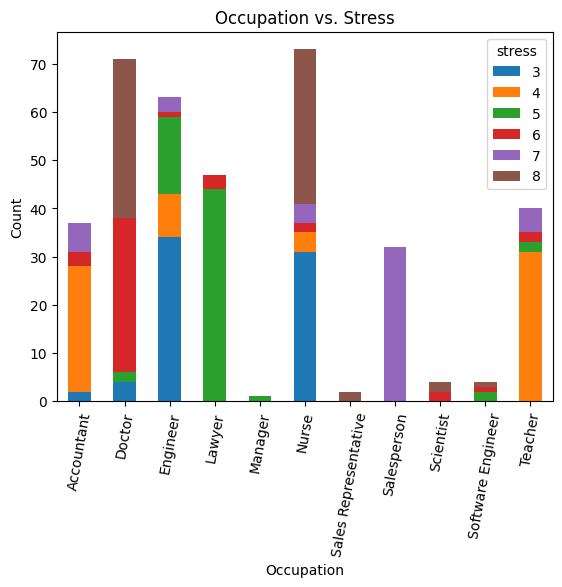

In [58]:
# Look closely to stress level by profession

occupation_stress = pd.crosstab(df['occupation'], df['stress'])
occupation_stress.plot(kind='bar', stacked=True)

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation vs. Stress')

plt.xticks(rotation=80)
plt.show()

Key:

Doctors, Salespersons, Scientists and Sales Representatives feel more stressed
Nurses divided by 2 experience: their job very stressful or not stressful at all
Lawyers are somewhere in the middle. Their job is not that intense
Teachers and Accountants and Engineers are feel less stressful

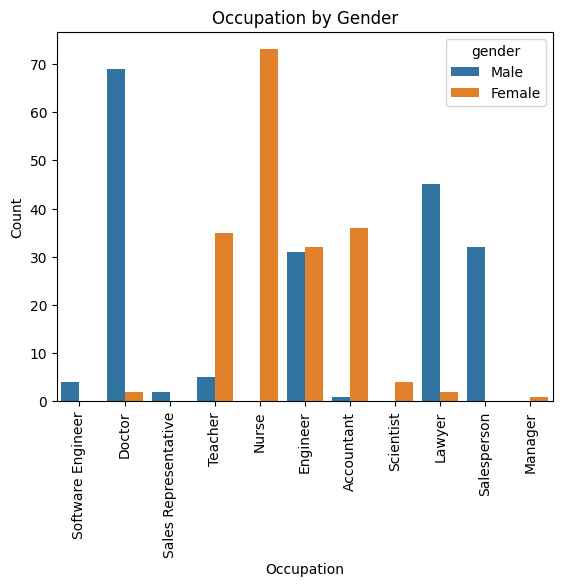

In [59]:
# Now let's divide occupation by gender to see clearly who deals with stressful proffessions

sns.countplot(data=df, x='occupation', hue='gender')

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Gender')
plt.xticks(rotation=90)
plt.show()

Key:

Stressful professions:

All salespersons and sales representatives are men
Almost all doctors and lawyers are men
All scientists are women
Hense, the most stressful jobs are mostly taken by men.

Less stressful ones:

Engineers are taken by men and women almost equaly
Teachers and Accountants are mostly women
Hense, less stressful jobs are taken by women

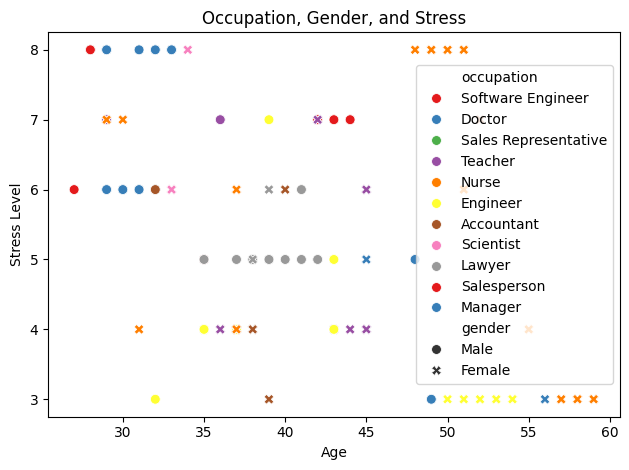

In [60]:
# extra plot for visualization

sns.scatterplot(data=df, x='age', y='stress', hue='occupation', palette='Set1', style='gender', s=50)

plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Occupation, Gender, and Stress')

plt.tight_layout()
plt.show()

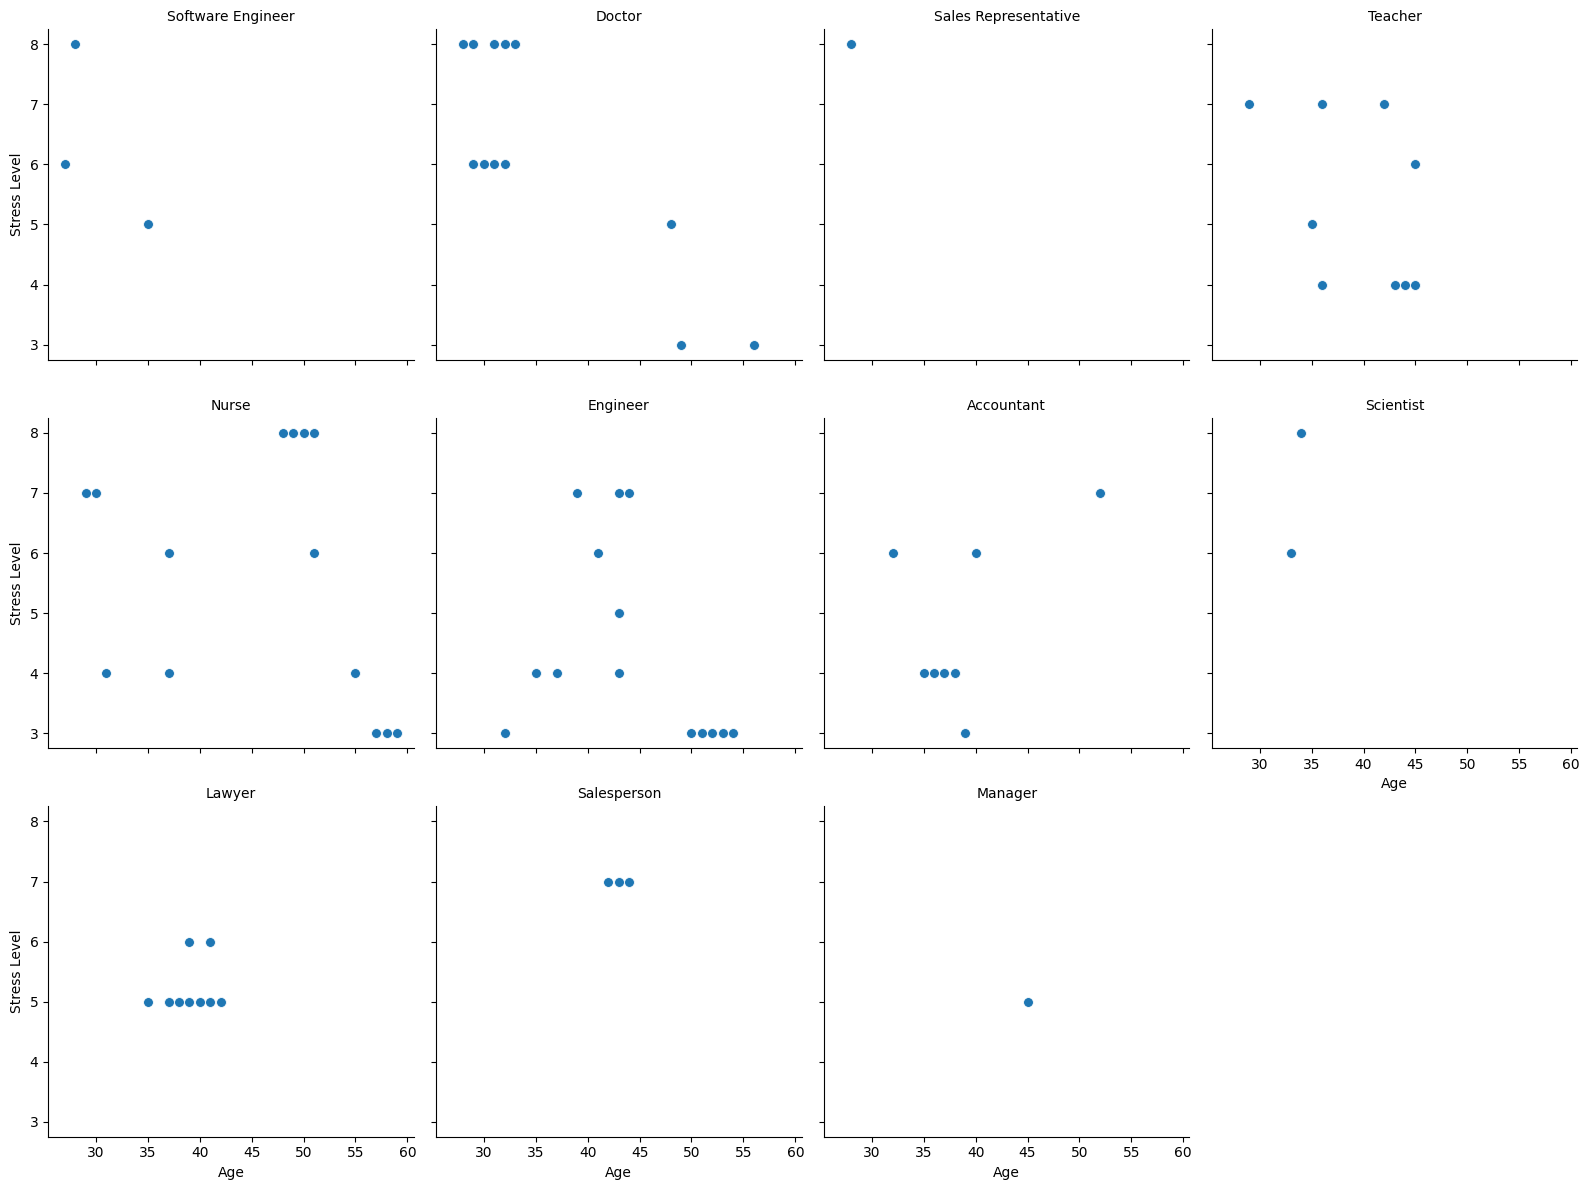

In [61]:
# Matrix represents each proffesion by age and stress level

grid = sns.FacetGrid(data=df, col='occupation', col_wrap=4, height=4)
grid.map(sns.scatterplot, 'age', 'stress', s=50)

grid.set_axis_labels('Age', 'Stress Level')
grid.set_titles(col_template="{col_name}")

grid.tight_layout()
plt.show()

Key:

With age doctors, teachers and engineers are less stressed
Accountants are more stressed with age
Nurses have different distribution, going down with age, raising at pick near 50 years and then significally go down.

Simpson's paradox

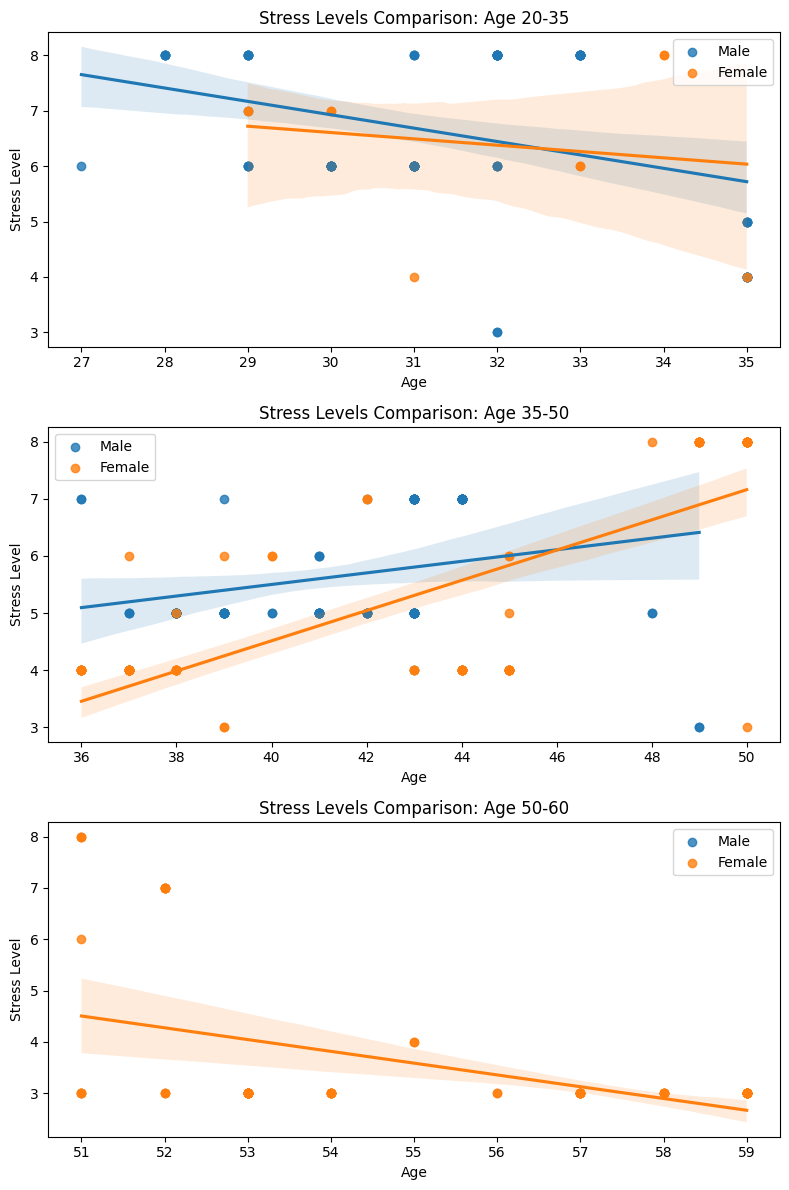

In [62]:
# Let's divide respondents on age gropus and measure their stress level

young = df[(df['age'] >= 20) & (df['age'] <= 35)]
middle_age = df[(df['age'] > 35) & (df['age'] <= 50)]
seniors = df[(df['age'] > 50) & (df['age'] <= 60)]

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

sns.regplot(data=young[young['gender'] == 'Male'], x='age', y='stress', ax=axs[0], label='Male')
sns.regplot(data=young[young['gender'] == 'Female'], x='age', y='stress', ax=axs[0], label='Female')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Stress Level')
axs[0].set_title('Stress Levels Comparison: Age 20-35')
axs[0].legend()

sns.regplot(data=middle_age[middle_age['gender'] == 'Male'], x='age', y='stress', ax=axs[1], label='Male')
sns.regplot(data=middle_age[middle_age['gender'] == 'Female'], x='age', y='stress', ax=axs[1], label='Female')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Stress Level')
axs[1].set_title('Stress Levels Comparison: Age 35-50')
axs[1].legend()

sns.regplot(data=seniors[seniors['gender'] == 'Male'], x='age', y='stress', ax=axs[2], label='Male')
sns.regplot(data=seniors[seniors['gender'] == 'Female'], x='age', y='stress', ax=axs[2], label='Female')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Stress Level')
axs[2].set_title('Stress Levels Comparison: Age 50-60')
axs[2].legend()

plt.tight_layout()
plt.show()

Key:

Here we see Simpson's paradox. In the correlation matrix tendency showed us that with age stress is going down, but if we divide age groups it is not so. With ongoing young age - experince of stress is going down, but after reaching middle age - stress is going up, especially among female, reaching it's peak at 50 years. After that stress is going down significally among women(we don't have Male respondents this age here)

AB-test

In [63]:
# We have almost even Female and Male Engineers. Let's take an AB-test to measure, if there is a differents between their stress level

engineer_data = df[df['occupation'] == 'Engineer']

male_stress = engineer_data[engineer_data['gender'] == 'Male']['stress']
female_stress = engineer_data[engineer_data['gender'] == 'Female']['stress']

t_statistic, p_value = stats.ttest_ind(male_stress, female_stress)

print('Results of the A/B test:')
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

alpha = 0.5
if p_value < alpha:
    print('There is a significant difference in stress levels between male and female engineers. The Null hypothesis denied')
else:
    print('There is no significant difference in stress levels between male and female engineers.')

Results of the A/B test:
T-Statistic: 10.4253
P-Value: 0.0000
There is a significant difference in stress levels between male and female engineers. The Null hypothesis denied


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


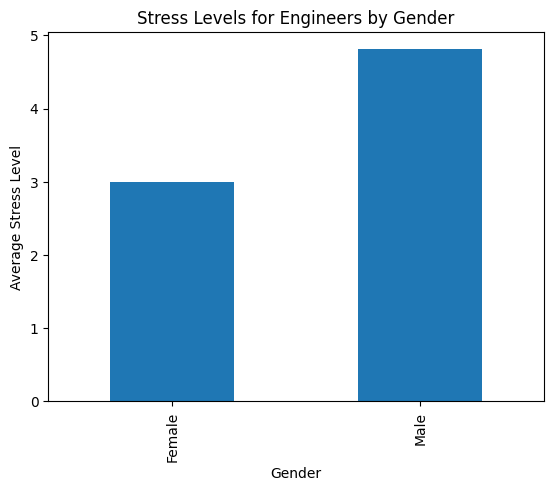

In [64]:
engineer_gender_data = engineer_data.groupby('gender')['stress'].mean() 

engineer_gender_data.plot(kind='bar', xlabel='Gender', ylabel='Average Stress Level', title='Stress Levels for Engineers by Gender')
plt.show()

Prediction

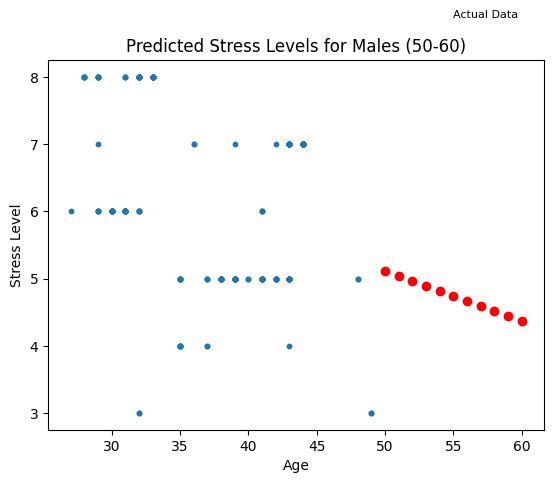

In [65]:
from sklearn.linear_model import LinearRegression

male_data = df[df['gender'] == 'Male']
age_values = male_data['age'].values
stress_levels = male_data['stress'].values

plt.scatter(age_values, stress_levels, label='Actual Data', s=10)

for age in range(50, 61):
    X = age_values.reshape(-1, 1)
    y = stress_levels
    model = LinearRegression()
    model.fit(X, y)

    new_age_values = np.array([[age]])
    predicted_stress_level = model.predict(new_age_values)
    
    plt.scatter(new_age_values, predicted_stress_level, color='red')

plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Predicted Stress Levels for Males (50-60)')

# Add the list of actual data as a text annotation
actual_data_text = 'Actual Data'
plt.text(55, 9, actual_data_text, fontsize=8, verticalalignment='top')

plt.show()

Key:

As for women, men with age are more likely to experience less stress with age
Conclusions correlation matrix
Key:

With more age people tend to have better sleep, which helps reduce stress. Also with age people have higher blood pressure
We can see correlation between sleep duration and sleep quality. One affects another
Higher stress corelated with high heart beat, poor quality and duration of sleep
High heart beat correlated with higher blood pressure, stress and worse quality of sleep
Physical active people tend to walk more often
Conclusion:

Of course, there is no rgulation, that older people should work less. It's their own consciouss choice. You can not work that much anymore and prefer spend more time resting or spending it with your family. And health is sensetive topic, cause with age it will have bigger consequences. Immune system become more fragile, so good sleep is important. High blood pressure is explained by changes of how hormones work. It might be result of decrease blood vessel function, stiffering of arteries, sodium sensitivety(salt), reduced kidney function and lifestyle factors.
While age-related hypertension is common, it is not an inevitable part of aging. Adopting healthy lifestyle habits can help manage and prevent high blood pressure. Regular exercise, a balanced diet low in sodium and high in fruits and vegetables, weight management, stress reduction, and avoiding tobacco and excessive alcohol consumption are all essential in maintaining healthy blood pressure levels as one ages.

Sleep quality here is much more significant than sleep durability, but since we see obvious correlation here, it means that interviewers are tend to undersleep, rather than oversleep. Sleeping for an appropriate duration allows for sufficient restorative sleep, which can promote better sleep quality, improved daytime functioning, and overall well-being.Consistently getting insufficient sleep, such as regularly sleeping less than the recommended hours, can negatively impact sleep quality. Inadequate sleep duration can lead to difficulties falling asleep, frequent awakenings during the night, and poorer sleep quality.
It's important to note that sleep quality and sleep duration can be influenced by various factors, including sleep disorders, lifestyle choices, stress, physical and mental health conditions, and environmental factors. Prioritizing good sleep hygiene practices, maintaining a regular sleep schedule, creating a comfortable sleep environment, managing stress, and seeking medical advice if experiencing persistent sleep disturbances can all contribute to better sleep quality and duration.

Stress and an increased heart rate are closely related physiological responses in the human body. When you experience stress, whether it's due to a perceived threat, emotional pressure, or any other stressor, your body activates the "fight-or-flight" response. During the fight-or-flight response, your body releases stress hormones such as adrenaline and cortisol. These hormones prepare your body to deal with the perceived threat or challenge by triggering several physiological changes, including an increased heart rate. The increased heart rate is part of the body's adaptive response to provide more oxygen and nutrients to the muscles and vital organs, preparing them for action. Such condition directly affect your sleep duration and quality or even may cause insomnia.

Physical active people might build healthy habits. One of them is walk specific amount of distance or just morning/evening walking around the park alone or with family.

Extra: Even we not see here correlation between physical activity and sleep quality they are very much connected. Regular and moderate physical activity helps reduce stress, improve health, slow down aging, normalize blood pressure. Practice fasting from time to time in healthy boundaries might trigger significant improvement in work of immune system. But before you try to practice it read or consult proffessionals if it's okay for you to try fasting. Diet in normalized periods and dozage with healthy food have huge impact on your mental and physical health. Try to develop good diet and persue so as absolute necessety. You perfectly know what is good for you and what is not. It's okay if you feel stress and reduce it smoking ciggaretes or try to relax by bottle of beer after a long day. You might eat a lot of sugar or ice cream to feel better, watch movies to distract yourself from a difficult or long day. We all humans and we all been there. If you can't drop bad habits right now, just learn how to be mindful when you do it. Yes, it will take time, you need to be patient. But if you dvelop mindfulness you might not only withdraw your habit, but never return to them again. Mindfulness is priceless ability to gain awareness with your life. You can start with smart-watch to monitor your sleep, your steps and physical activity. Some of the cheapiest ones cost 10-20 dollars. To improve your mindfulness you can read some books, there are thousands of them to help you.

Conclusions data analysis
Key:

Males

Men en their 20s feel under a lot of stress
In their 30s dispersion of stress level is wider
In their 40s they are pretty equal between normal and high level of stress
Females

As men, they are feel under pressure
Much easier at their 30s
Strong dividness between easiness and very high stress in their 40s
Significally less stressed in their 50s
Key:

Doctors, Salespersons, Scientists and Sales Representatives feel more stressed
Nurses divided by 2 experience: their job very stressful or not stressful at all
Lawyers are somewhere in the middle. Their job is not that intense
Teachers and Accountants and Engineers are feel less stressful
Key:

With age doctors, teachers and engineers are less stressed
Accountants are more stressed with age
Nurses have different distribution, going down with age, raising at pick near 50 years and then significally go down.
Key:

Females have better sleep quality than males, which could be reason why females are less stressed
Key:

Here we see Simpson's paradox. In the correlation matrix tendency showed us that with age stress is going down, but if we divide age groups it is not so. With ongoing young age - experince of stress is going down, but after reaching middle age - stress is going up, especially among female, reaching it's peak at 50 years. After that stress is going down significally among women(we don't have Male respondents this age here)
Conclussion:

First of all, the result doesn't mean that men have more stressful jobs than women. It can be explained, that male are feel that they are under more stress. It is might also mean, that men do not no or spend enough time for relaxations. Different industries and occupations have their own unique stressors. For example, jobs that involve high levels of responsibility, long working hours, and high-pressure decision-making, such as corporate leadership roles or certain healthcare professions, can be stressful regardless of gender. This results simply mean, that men should pay more attention to their stress level. Be aware of how they feel and spend more time to find healthy relaxation habits and care about quality of sleep.

We found out that both young men and women are feel more stress. It could be caused by next reasons:

Transition periods: Young people go through significant life transitions, such as moving from high school to college, entering the workforce, or starting independent living. These transitions can bring about new responsibilities, expectations, and challenges, which can lead to increased stress.

Academic pressures: The academic demands placed on young people, such as exams, assignments, and expectations for achievement, can be a significant source of stress. The pressure to perform well academically, meet deadlines, and make important decisions about future career paths can contribute to high stress levels.

Career uncertainty: Face uncertainty and pressure when it comes to career choices. The competitive job market, limited work experience, and the desire to find meaningful and fulfilling employment can all lead to increased stress.

Financial concerns: Often face financial stress related to tuition fees, student loans, living expenses, and the transition to financial independence. These financial pressures can cause significant stress and anxiety.

Social pressures: Young people may experience stress related to social interactions and fitting in. They may face pressure to conform to societal expectations, maintain friendships, navigate romantic relationships, and manage social media presence, which can all contribute to stress.

Technology and information overload: Constant exposure to social media, news, and online platforms can lead to information overload and comparisons with others. This can create stress, anxiety, and a fear of missing out (FOMO). It's important to note that while young people may experience higher levels of stress, individuals' experiences can vary greatly. Some young people may have effective coping mechanisms and support systems in place to manage stress, while others may require additional support and resources.

Even we found out, that young age stress level is going down from 27 to 35 years and generaly it goes down with age, with middle age group from 35 to 50 we have growth of stress for men and women. It can be explained by:
Midlife transitions: Experience significant life transitions, such as career changes, caring for aging parents, empty nest syndrome, or contemplating their own mortality. These transitions can bring about added responsibilities, uncertainties, and emotional challenges, which may contribute to increased stress.

Financial and work related concerns: By the time individuals reach their 50s, they may face financial pressures related to retirement planning, supporting children or grandchildren, or managing expenses associated with aging parents. These financial responsibilities can add stress and uncertainty about the future. Individuals in their 50s may face stress related to career stability, job satisfaction, and concerns about remaining competitive in the workplace.

Health-related worries: As people age, they may become more aware of their health and experience age-related health concerns. Worries about maintaining good health, managing chronic conditions, and the physical changes that come with aging can contribute to stress.

Psychological factors: Midlife can be a period of self-reflection and introspection, which can lead to increased stress. Individuals may reevaluate their life choices, question their achievements, or experience a sense of unfulfilled goals, which can contribute to emotional stress.

Seniors from 50 to 60 are significally less stressed then the other age groups. The rasons might be:
Perspective and life experience: With age comes the accumulation of life experiences, which can provide a broader perspective and a better ability to handle stress. They may have developed coping mechanisms and resilience over time, allowing them to approach stressful situations with a greater sense of calm and wisdom.

Reduced societal pressures: Feel less pressure to conform to societal expectations or meet certain milestones compared to younger age groups. This can result in a decreased sense of external stress and a greater focus on personal fulfillment and well-being.

Retirement and reduced work-related stress: For individuals who have retired, there may be a reduction in work-related stressors such as long hours, tight deadlines, or demanding bosses. This shift can lead to more leisure time, flexibility, and the ability to engage in activities that promote relaxation and enjoyment.

Stable relationships and support systems: Established strong social networks and support systems over time, including long-term relationships, friendships, and family connections. These relationships can provide emotional support and a sense of security, which can help mitigate stress.

Health and self-care: While health concerns can increase with age, some prioritize their well-being and engage in self-care practices. Regular exercise, healthy eating, and appropriate medical care can contribute to better physical and mental health.

Doctors, salespersons, scientists, and sales representatives can experience higher levels of stress due to various factors related to their respective professions:
Doctors: They deal with long working hours, demanding schedules, life-or-death decisions, heavy workloads, and the emotional toll of dealing with patients' health issues. Additionally, the responsibility and pressure associated with diagnosing and treating patients can contribute to stress.

Salespersons and reprsentatives: Sales roles often involve meeting sales targets, working on commission, and dealing with the pressure of meeting clients expectations. There can be high levels of competition, rejection, and the need to constantly perform to maintain job security and financial stability. The fast-paced and target-driven environment in sales can contribute to increased stress levels.

Scientists: They have tight deadlines, the need to secure funding for their research, competition for grants or publications, and the pressure to make groundbreaking discoveries. Additionally, the challenges associated with experimental design, data analysis, and maintaining research integrity can contribute to stress.

Teachers and Accountants and Engineers are feel less stressful. Might be because:
Defined work hours: These professions often have more defined work hours compared to roles with irregular or unpredictable schedules. This allows individuals to have a better work-life balance and know when they are expected to be working, which can help reduce stress.

Predictable routines: Teachers, accountants, and engineers often have more predictable routines and tasks compared to roles with constant changes or high levels of uncertainty. Having a structured and familiar workflow can contribute to a sense of control and reduce stress associated with unpredictability.

Lower exposure to high-stakes decision-making: While these professions still require decision-making, the immediate consequences of their decisions may be less critical or life-altering compared to roles like doctors or business executives. This can help alleviate stress associated with making high-stakes decisions.

Work environment: The work environments in these professions, such as classrooms, offices, or engineering labs, are often more stable and less physically demanding compared to roles in industries like construction or healthcare.

Nurses have verious level of stress. We can see that it goes up to peak stress when they are about 50 years old and then it goes significally down. Which can be explained by:
Career longevity: Nurses in their 50s may have been working in the nursing profession for a considerable period, which can lead to accumulated stress from years of patient care, demanding schedules, and exposure to high-pressure healthcare environments.

Icreased responsibilities: At the end of the middle age, they could be promoted to higher positions within their nursing careers, such as nurse managers or nurse educators.

Financial security: Increased stress might be caused by working many years and having not competitive outcome. At this age money is necessary for health support, support children or grandchildren to basic needs, education or to buy their own property. Reaching retirement age canceling this problem. You can keep working to have extra buck with your retirement money.

Retirement profession: After retirement seniors are less competitive in many proffessional areas, but as for teachers - nurses as well could still work there even in senior age. Personally, I know many senior people, who found a job as a nurse after retirement.

Conclusion AB-test
Key:

There is a significant difference in stress levels between male and female engineers. The Null hypothesis denied
Concusion:

I hypothesized earlier, that stress level might be explained to only by proffesional choice, but a self-care and quality of sleep. We took the same proffession and got different results for each gender. Men are more stressed then women. From this conclusion I can only recommend as earlier, that men should pay more attention to their well-being and stress leve, especially including quality of sleep. This AB-test comfirm base for such recommendation.